In [2]:
# Import Packages
from netCDF4 import Dataset as NetCDFFile 
from matplotlib.colors import ListedColormap

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as colors

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# NASA GISS Temperature Anomalies Multiyear Plotting
### https://data.giss.nasa.gov/gistemp/maps/

In [3]:
# Set up loop for plotting desired years
# (first year, last year + 1, increment)
for year in range(1962,2021+1,1):
    # Load file
    nc = NetCDFFile('./Data/NASA_GISS/Annual/'+str(year)+'.nc')
    
    # Set variable names and calculate global mean anomaly
    lats = nc.variables['lat'][:]
    lons = nc.variables['lon'][:]
    tempAnom = nc.variables['TEMPANOMALY'][:]
    globalTempAnom = np.mean(tempAnom) # does not match NASA GISS
    
    # Set symbol and color for global temperature anomaly text
    if globalTempAnom > 0:
        symbol = '+'
        color = 'red'
    else:
        symbol = ''
        color = 'blue'
        
    # Set up figure parameters
    plt.rcParams['axes.facecolor'] = 'grey'
    plt.rcParams['figure.facecolor'] = 'black'

    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=0))
    ax.set_global()

    gl = ax.gridlines(ccrs.PlateCarree(), draw_labels=False, color='grey')


    #Plot the data on top of the map
    lon2d,lat2d = np.meshgrid(lons,lats)

    # Set up levels, contour interval, and colormap
    min_plot_value = -4
    max_plot_value = 4
    contour_interval = 0.25
    clevs = np.arange(min_plot_value,max_plot_value,contour_interval)
    cmap = 'seismic'

    # Normalize to zero as center
    norm = colors.TwoSlopeNorm(vcenter=0)

    # Plot data
    plot = ax.contourf(lon2d, lat2d, tempAnom, clevs, norm=norm, cmap=cmap, 
                       extend='both', transform=ccrs.PlateCarree())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES)

    # Add a colorbar
    cb = fig.colorbar(plot, orientation='horizontal', shrink=0.7, pad=0.05,
                      ticks=[-4,-3,-2,-1,0,1,2,3,4])

    cb.set_label('Temperature Anomaly (°C)', size=16, weight='bold', color='white', labelpad=10)
    plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color='white')
    cb.ax.tick_params(labelsize=12)
    cb.ax.set_xticklabels(['-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'])


    # Set Plot Titles
    plt.title('Temperature Anomalies for '+ str(year), loc='center', fontsize=22, 
              weight='bold', color='white', pad=20)

    plt.title(symbol+str(round(globalTempAnom,2)), loc='right', fontsize=22, 
              weight='bold', color=color)
    
    #print('Plotting: ' + str(year))

    # Save Figure
    plt.savefig('./Figures/NASA_GISS/Annual/'+str(year)+'.png', dpi=300, 
                bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')
    
    # Important to close the figure windows
    plt.close()

# Single Year Plots

In [9]:
# Set desired year
year = '2020'

In [10]:
# Load file
nc = NetCDFFile('./data/NASA_GISS/Annual/'+year+'.nc')

In [11]:
#nc

In [12]:
#nc.variables.keys()

In [8]:
# Set variable names
lats = nc.variables['lat'][:]
lons = nc.variables['lon'][:]
tempAnom = nc.variables['TEMPANOMALY'][:] # Temperature Trend
globalTempAnom = np.mean(tempAnom)

In [8]:
# Set symbol and color for global temperature anomaly
if globalTempAnom > 0:
    symbol = '+'
    color = 'red'
else:
    symbol = ''
    color = 'blue'

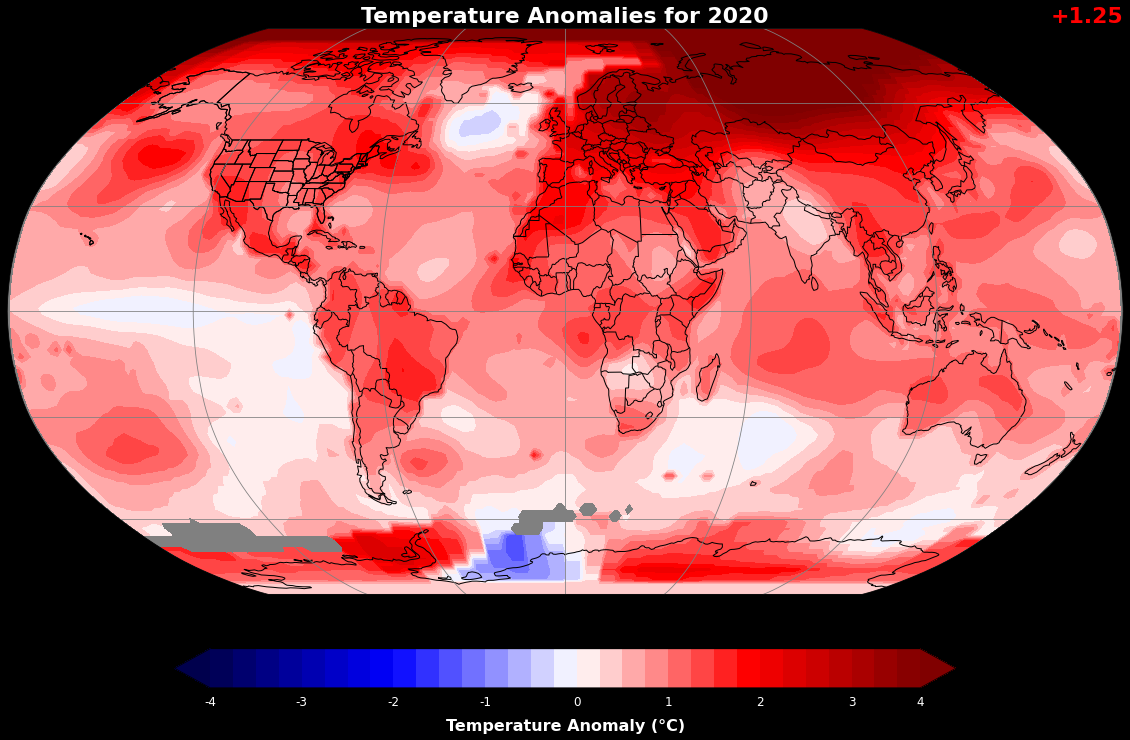

In [9]:
# Set up figure parameters

plt.rcParams['axes.facecolor'] = 'grey'
plt.rcParams['figure.facecolor'] = 'black'

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson(central_longitude=0))
ax.set_global()

gl = ax.gridlines(ccrs.PlateCarree(), draw_labels=False, color='grey')

#Plot the data on top of the map
lon2d,lat2d = np.meshgrid(lons,lats)

min_plot_value = -4
max_plot_value = 4
contour_interval = 0.25
clevs = np.arange(min_plot_value,max_plot_value,contour_interval)
cmap = 'seismic'

norm = colors.TwoSlopeNorm(vcenter=0)

plot = ax.contourf(lon2d, lat2d, tempAnom, clevs, norm=norm, cmap=cmap, 
                   extend='both', transform=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.STATES)

cb = fig.colorbar(plot, orientation='horizontal', shrink=0.7, pad=0.05,
                  ticks=[-4,-3,-2,-1,0,1,2,3,4])

cb.set_label('Temperature Anomaly (°C)', size=16, weight='bold', color='white', labelpad=10)
plt.setp(plt.getp(cb.ax.axes, 'xticklabels'), color='white')
cb.ax.tick_params(labelsize=12)
cb.ax.set_xticklabels(['-4', '-3', '-2', '-1', '0', '1', '2', '3', '4'])



# Set Plot Title
plt.title('Temperature Anomalies for '+ year, loc='center', fontsize=22, 
          weight='bold', color='white', pad=20)

plt.title(symbol+str(round(globalTempAnom,2)), loc='right', fontsize=22, 
          weight='bold', color=color)

plt.show()

# Save Figure
#plt.savefig('./images/NASA/Annual/'+year+'.png', dpi=300, 
            #bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')